In [1]:
#we may need some code in the ../python directory and/or matplotlib styles
import sys
sys.path.append('../python/')

#matplotlib for plotting
import matplotlib as mpl
from matplotlib import pyplot as plt
plt.style.use('mplstyles/stylelib/standard.mplstyle')

#other computational libraries
import numpy as np

In [2]:
import numpy as np

#kb*N = n*R
kb = 1.381e-23 #J/K
R = 8.315 #J/mol K
Na = 6.0221409e23

#argon
#https://en.wikipedia.org/wiki/Van_der_Waals_constants_(data_page)
a=1.355
b=0.03201

#water
a=5.536
b=0.03049

#generic (pg 181 of Schroeder)
#a=4*4e-49*Na**2*(1000)**2*(1/1000.)*(1/100.0)
#b=6e-29*Na*1000.0
print(a)
print(b)

#critical temp
Tc = (8/27)*(a/b)*100*1000*(1/1000.0)/R
Pc = (1/27)*(a/b**2)*100*1000

print(Tc)
print(Pc)

5.536
0.03049
646.997535462095
22055528.482155304


In [3]:
#set up for root finding (always use 1 mole of substance)


#put a into units of [[m^3]**2 Pa]/mol^2
au = a*((1/1000.)**2)*100*1000
#put b into [m^3]/mol
bu = b*(1/1000.0)


#make the P equation
n = 1 #1 mole
Ttest = 0.85*Tc #Kelvin

Vtest=55 #cm**3
print(n*bu*100**3)
print((n*R*Ttest)/((Vtest/100**3)-n*bu))
print(au*n**2/((Vtest/100**3)**2))
print(((Vtest/100**3)-n*bu))

Pvdw = lambda v,T: ((n*R*T)/(v-n*bu)) - au*n**2/v**2
#Pvdw = lambda v: ((n*R*T)/(v))

print(Pvdw(Vtest/100**3,Ttest))
Pvdw_v = np.vectorize(Pvdw)
print(Pvdw(20000/100**3,Ttest))

30.490000000000002
186569434.16002536
183008264.46280986
2.451e-05
3561169.6972154975
227605.93672164326


3602356824.987032


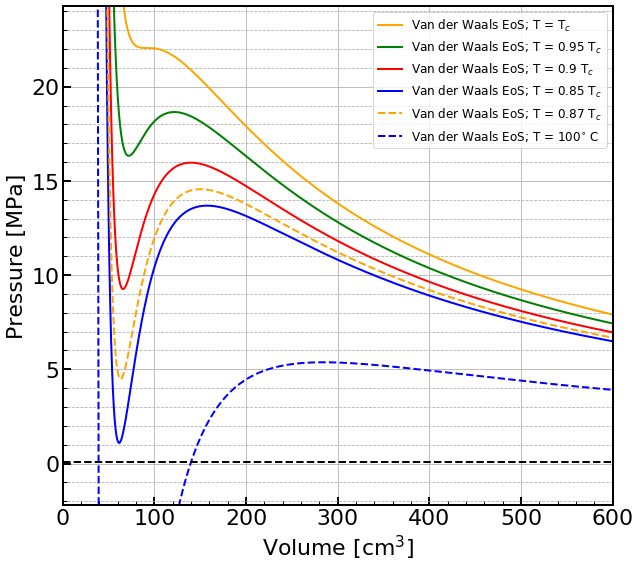

In [4]:
#set up a 1d plot
fig,axes = plt.subplots(1,1,figsize=(9.0,8.0),sharex=True)
ax1 = axes

vmax=600 #cm3
cm=1/100**3
X=np.arange((n*bu*100**3+1)*cm,vmax*cm,0.01*cm)
#print(X*100**3)
print(Pvdw_v(X[10],Ttest))
Xcm = X*100**3

ax1.plot(Xcm,Pvdw_v(X,Tc)/1e6,color='orange',linestyle="-",linewidth=2, \
         label='Van der Waals EoS; T = T$_c$')
ax1.plot(Xcm,Pvdw_v(X,0.95*Tc)/1e6,color='g',linestyle="-",linewidth=2, \
         label='Van der Waals EoS; T = 0.95 T$_c$')
ax1.plot(Xcm,Pvdw_v(X,0.9*Tc)/1e6,color='r',linestyle="-",linewidth=2, \
         label='Van der Waals EoS; T = 0.9 T$_c$')
ax1.plot(Xcm,Pvdw_v(X,0.85*Tc)/1e6,color='b',linestyle="-",linewidth=2, \
         label='Van der Waals EoS; T = 0.85 T$_c$')
ax1.plot(Xcm,Pvdw_v(X,0.87*Tc)/1e6,color='orange',linestyle="--",linewidth=2, \
         label='Van der Waals EoS; T = 0.87 T$_c$')
ax1.plot(Xcm,Pvdw_v(X,0.5767*Tc)/1e6,color='b',linestyle="--",linewidth=2, \
         label='Van der Waals EoS; T = 100$^{\circ}$ C')
#ax1.plot(E,sig,color='r',linestyle="-",linewidth=2, \
#         label='single-scatter res. model (ER) (aH={})'.format(aH))
#ax1.errorbar(xE,qbootsigs, yerr=(qbootsigerrsl,qbootsigerrsu), \
#             color='k', marker='o',markersize=4,linestyle='none',label='ER scatters', linewidth=2)

#ax1.axhline(y=101325/1e6,xmin=0,xmax=vmax*100**3*cm,color='k',linestyle='--',linewidth=2)
ax1.axhline(y=101325/1e6,xmin=0,xmax=1,color='k',linestyle='--',linewidth=2)



ymin = -0.1*Pc/1e6
#ymax = 100000.0*100
ymax = 1.1*Pc/1e6



ax1.set_yscale('linear')
#ax1.set_yscale('log')
ax1.set_xlim(0.0, vmax*100**3*cm) 
ax1.set_ylim(ymin,ymax)
ax1.set_xlabel(r'Volume [cm$^3$]')
ax1.set_ylabel('Pressure [MPa]')
ax1.grid(True)
ax1.yaxis.grid(True,which='minor',linestyle='--')
ax1.legend(loc=1,prop={'size':12})
#ax1.legend(bbox_to_anchor=(1.04,1),borderaxespad=0,prop={'size':22})

for axis in ['top','bottom','left','right']:
  ax1.spines[axis].set_linewidth(2)

plt.tight_layout()
#plt.savefig('figures/figure.png')
plt.show()

In [5]:
#now find the three possible molar volumes below Tc

#generic (pg 181 of Schroeder)
asi=a*(1/1000**2)*100*1000/Na**2 #now [Pa m**3**2]
bsi=b/1000/Na # now [m**3]

print(a)
print(asi)
print(bsi)


5.536
1.526491029488477e-48
5.062983498111112e-29


In [6]:
#set up the root finder for third order polynomial
Ptest = 101.325e3 #ATM in Pa
Ttest = 373.15 #K -- room temp
#Ttest = Tc*0.9
#Ptest = 10e6
A = 1
B = -(Ptest*Na*bsi + Na*kb*Ttest)/Ptest
C = asi*Na**2/Ptest
D = -asi*Na**3*bsi/Ptest

print(A)
print(B)
print(C)
print(D)

r=np.roots([A,B,C,D])
print(r)
print(Pvdw(r[1],Ttest))
print(r*100**3)

1
-0.0306579812598977
5.463607204539845e-06
-1.665853836664199e-10
[3.04789019e-02 1.40054576e-04 3.90247630e-05]
95955.54637937993
[30478.90192095   140.05457597    39.02476298]


In [7]:
# make a function for solving the cubic equation. 

def vmulti(P,T,a=4*4e-49*Na**2*(1000)**2*(1/1000.)*(1/100.0),b=6e-29*Na*1000.0):

  asi=a*(1/1000**2)*100*1000/Na**2 #now [Pa m**3**2]
  bsi=b/1000/Na # now [m**3]
  A = 1
  B = -(P*Na*bsi + Na*kb*T)/P
  C = asi*Na**2/P
  D = -asi*Na**3*bsi/P


  return np.roots([A,B,C,D])*100**3

print(vmulti(Ptest,Ttest,a,b))

[30478.90192095   140.05457597    39.02476298]


In [8]:
#Now compute the Gibbs Free Energy for a mole

def g(P,T,a,b):
    asi=a*(1/1000**2)*100*1000/Na**2 #now [Pa m**3**2]
    bsi=b/1000/Na # now [m**3]
    
    gret = np.zeros((np.shape(P)[0],3))
    for i,press in enumerate(P):
      v = vmulti(P[i],T,a,b)/100**3
      real = np.isreal(v)&(v>0)
      #print(real)
      #print(np.shape(v[real])[0])
      if np.shape(v[real])[0] < 3:
        #v = np.ones(np.shape(v))
        #v[real] = v[real]
        #print(v[real])
        v[~real] = np.ones(np.shape(v[~real]))*np.min(v[real])
        #print(np.shape(v[real]))
        #print(v[~real])
        #print(v)
      #print(v)
      gret[i,:] = -Na*kb*T*np.log(v-Na*bsi)+Na*kb*T*Na*bsi/(v-Na*bsi) - 2*asi*Na**2/v
    
    #return -Na*kb*T*np.log(v-Na*bsi)+Na*kb*T*Na*bsi/(v-Na*bsi) - 2*asi*Na**2/v
    return gret

print(g([Ptest,0.5*Ptest],0.1*Tc,a,b))
print(np.min(g([Ptest,0.5*Ptest],0.1*Tc,a,b),1))

[[  2703.92288821   2756.39923388 -10681.61622317]
 [  2392.22126132   2695.1806134  -10683.2096259 ]]
[-10681.61622317 -10683.2096259 ]


24.261081330370835
[103.04144775+0.18735413j 103.04144775-0.18735413j
  74.69354603+0.j        ]
[139.7822415  139.72256492  54.09319445]
[[37602.95188982 37602.95188984 37382.33244056]]
[139.75238483+0.0472041j 139.75238483-0.0472041j  54.09319327+0.j       ]
[[37382.33254875 37382.33254875 37382.33254875]]
(456, 3)
(456, 3)
(456,)
(901, 3)


/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:22: ComplexWarning: Casting complex values to real discards the imaginary part


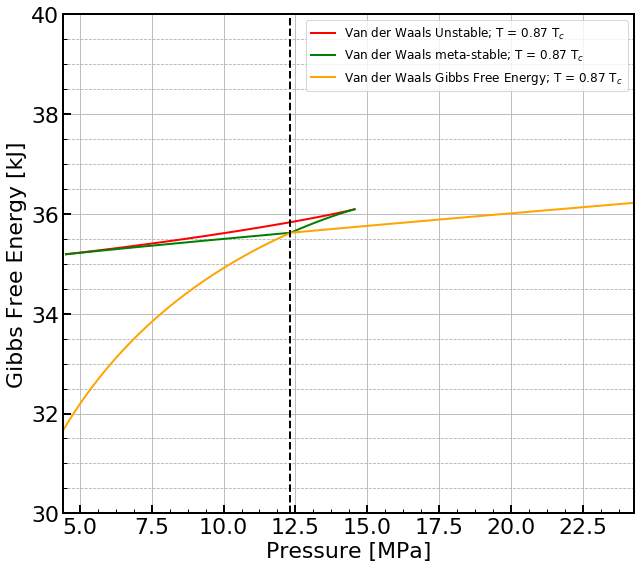

In [9]:
#set up a 1d plot
fig,axes = plt.subplots(1,1,figsize=(9.0,8.0),sharex=True)
ax1 = axes

pmax=1.1*Pc/1000/1000 #Pa
print(pmax)
Xp=np.arange(0.2*Pc/1000/1000,pmax,0.001*Pc/1000/1000)
Xp_ds=np.arange(0.2*Pc/1000/1000,pmax,0.01*Pc/1000/1000)
#print(0.01*Pc/1000/1000)
print(vmulti(21.2836e6,0.99*Tc,a,b))

Ptest = 15.976893e6
print(vmulti(Ptest,0.9*Tc,a,b))
print(g([Ptest],0.9*Tc,a,b))

Ptest = 15.976895e6
print(vmulti(Ptest,0.9*Tc,a,b))
print(g([Ptest],0.9*Tc,a,b))
#print(g(Xp_ds*1e6,0.9*Tc,a,b))


tfrac=0.87

gmat = g(Xp*1e6,tfrac*Tc,a,b)
gmin = np.ones(np.shape(gmat))
gmin[:,0] = np.min(gmat,1)
gmin[:,1] = np.min(gmat,1)
gmin[:,2] = np.min(gmat,1)
minidx = (gmat==gmin)
stbl_idx = (gmat[:,0]==np.min(gmat,1))&(gmat[:,1]==np.min(gmat,1))&(gmat[:,2]==np.min(gmat,1))
Xp_restricted = Xp[~stbl_idx]
gmat_unstable = np.sort(gmat[~stbl_idx,:],1)
print(np.shape(gmat_unstable))
#print(Xp_restricted)

print(np.shape(gmat_unstable))
print(np.shape(Xp_restricted))
print(np.shape(minidx))
ax1.plot(Xp_restricted,gmat_unstable[:,2]/1000,color='r',linestyle="-",linewidth=2, \
         label='Van der Waals Unstable; T = {:1.2f} T$_c$'.format(tfrac))
ax1.plot(Xp_restricted,gmat_unstable[:,1]/1000,color='g',linestyle="-",linewidth=2, \
         label='Van der Waals meta-stable; T = {:1.2f} T$_c$'.format(tfrac))
ax1.plot(Xp,np.min(g(Xp*1e6,tfrac*Tc,a,b),1)/1000,color='orange',linestyle="-",linewidth=2, \
         label='Van der Waals Gibbs Free Energy; T = {:1.2f} T$_c$'.format(tfrac))

#ax1.plot(E,sig,color='r',linestyle="-",linewidth=2, \
#         label='single-scatter res. model (ER) (aH={})'.format(aH))
#ax1.errorbar(xE,qbootsigs, yerr=(qbootsigerrsl,qbootsigerrsu), \
#             color='k', marker='o',markersize=4,linestyle='none',label='ER scatters', linewidth=2)

ymin = 30000/1000
#ymax = 100000.0*100
ymax = 40000/1000

#ax1.axvline(x=101325/1e6,ymin=ymin,ymax=ymax,color='k',linestyle='--',linewidth=2)
ax1.axvline(x=12.3,color='k',linestyle='--',linewidth=2)




ax1.set_yscale('linear')
#ax1.set_yscale('log')
ax1.set_xlim(Xp[0], pmax) 
ax1.set_ylim(ymin,ymax)
ax1.set_xlabel(r'Pressure [MPa]')
ax1.set_ylabel('Gibbs Free Energy [kJ]')
ax1.grid(True)
ax1.yaxis.grid(True,which='minor',linestyle='--')
ax1.legend(loc=1,prop={'size':12})
#ax1.legend(bbox_to_anchor=(1.04,1),borderaxespad=0,prop={'size':22})

for axis in ['top','bottom','left','right']:
  ax1.spines[axis].set_linewidth(2)

plt.tight_layout()
#plt.savefig('figures/figure.png')
plt.show()

In [38]:
#plot the Helmholtz Free Energy
#dead easy because F(T,V,N) and our (dF/dV)T,N = - P equation all depends on V only. 

def f(v,T,a,b):
    asi=a*(1/1000**2)*100*1000/Na**2 #now [Pa m**3**2]
    bsi=b/1000/Na # now [m**3]
    return -Na*kb*T*np.log(v-Na*bsi) - asi*Na**2/v
   

v = vmulti(0.6*Pc,0.9*Tc,a,b)/100**3
print(v[0])
print(f(v[2],0.9*Tc,a,b)/1000)
    

0.0002490093370868705
41.33221616347035


5.380804552618072
91.46999999999998
0.557683304208815
0.87
[ 6.00068334  5.98142623  5.96220713  5.94302541  5.92388043  5.90477156
  5.88569816  5.86665958  5.84765518  5.8286843   5.80974628  5.79084045
  5.77196613  5.75312266  5.73430933  5.71552546  5.69677035  5.67804328
  5.65934354  5.6406704   5.62202313  5.60340097  5.58480319  5.566229
  5.54767765  5.52914833  5.51064025  5.4921526   5.47368455  5.45523527
  5.43680391  5.4183896   5.39999146  5.38160858  5.36324006  5.34488497
  5.32654234  5.30821122  5.28989061  5.27157951  5.25327686  5.23498163
  5.21669273 -6.68087204  1.13149507  1.13130869  1.13112264  1.13093694
  1.13075156  1.13056652  1.13038182  1.13019744]
43
12.836317576614219
24.261081330370438
35192.62344921948
[256.43990379 102.36808947  52.27549948]
256.4399037948132
[ 52.27549948 256.43990379]
[39.6602718  37.14164616]


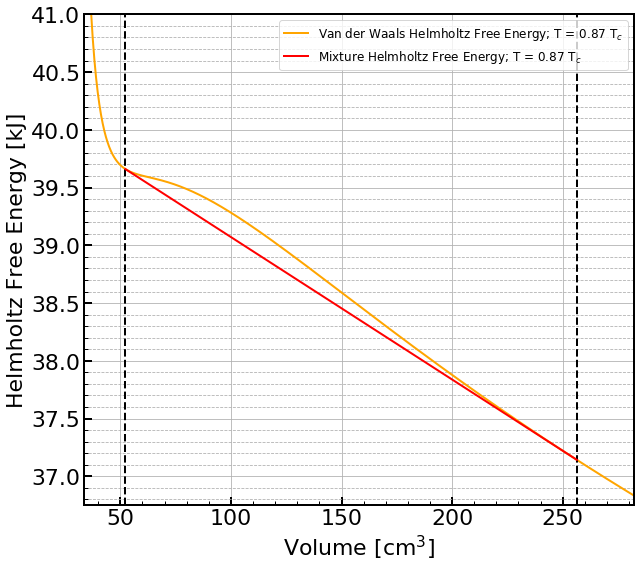

In [46]:
#set up a 1d plot
fig,axes = plt.subplots(1,1,figsize=(9.0,8.0),sharex=True)
ax1 = axes

print(Na*kb*Tc/1000.0)
print(3*Na*bsi*100**3)
pfrac=12.3e6/Pc
print(pfrac)
print(tfrac)
idx = (gmat[:,0]/1000.0>35.5)&(gmat[:,0]/1000.0<35.75)
print(np.diff(gmat[idx,0]))
print(np.argmin(np.diff(gmat[idx,0])))
pred = Xp[idx]
print(pred[np.argmin(np.diff(gmat[idx,0]))])
print(Xp[np.argmax(gmat[:,0])])
print(gmat_unstable[0,1])
v = vmulti(pfrac*Pc,tfrac*Tc,a,b)/100**3
print(v*100**3)
vmax = 1.1*np.max(v)*100**3 #cm**3
vmin = 0.5*np.min(v)*100**3 #cm**3
vmin = 1.1*Na*bsi*100**3 #cm**3

Xv=np.arange(vmin,vmax,(vmax-vmin)/1000.0)


#print(Xv)
#print(f(Xv/100**3,tfrac*Tc,a,b)/1000.0)


ax1.plot(Xv,f(Xv/100**3,tfrac*Tc,a,b)/1000.0,color='orange',linestyle="-",linewidth=2, \
         label='Van der Waals Helmholtz Free Energy; T = {:1.2f} T$_c$'.format(tfrac))

#ax1.plot(E,sig,color='r',linestyle="-",linewidth=2, \
#         label='single-scatter res. model (ER) (aH={})'.format(aH))
#ax1.errorbar(xE,qbootsigs, yerr=(qbootsigerrsl,qbootsigerrsu), \
#             color='k', marker='o',markersize=4,linestyle='none',label='ER scatters', linewidth=2)

ymin = 36750/1000
#ymax = 100000.0*100
ymax = 41000/1000

#ymin = -59000/1000
#ymax = 100000.0*100
#ymax = -32000/1000
print(v[0]*100**3)
ax1.axvline(x=v[2]*100**3,color='k',linestyle='--',linewidth=2)
ax1.axvline(x=v[0]*100**3,color='k',linestyle='--',linewidth=2)

#draw the straight line:
Xv_line = np.asarray([v[2],v[0]])*100**3
f_line = f(Xv_line/100**3,tfrac*Tc,a,b)/1000.0
print(Xv_line)
print(f_line)

ax1.plot(Xv_line,f_line,color='r',linestyle="-",linewidth=2, \
         label='Mixture Helmholtz Free Energy; T = {:1.2f} T$_c$'.format(tfrac))




ax1.set_yscale('linear')
#ax1.set_yscale('log')
ax1.set_xlim(vmin, vmax) 
#ax1.set_xlim(0, 6000) 
ax1.set_ylim(ymin,ymax)
ax1.set_xlabel(r'Volume [cm$^{3}$]')
ax1.set_ylabel('Helmholtz Free Energy [kJ]')
ax1.grid(True)
ax1.yaxis.grid(True,which='minor',linestyle='--')
ax1.legend(loc=1,prop={'size':12})
#ax1.legend(bbox_to_anchor=(1.04,1),borderaxespad=0,prop={'size':22})

for axis in ['top','bottom','left','right']:
  ax1.spines[axis].set_linewidth(2)

plt.tight_layout()
#plt.savefig('figures/figure.png')
plt.show()